# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')

In [2]:
# load data
data_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data_test  = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
# Merge data
df = pd.concat([data_train, data_test])

In [4]:
df.shape

(981, 13)

In [5]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# dropna 
df.dropna(inplace=True)

# EDA

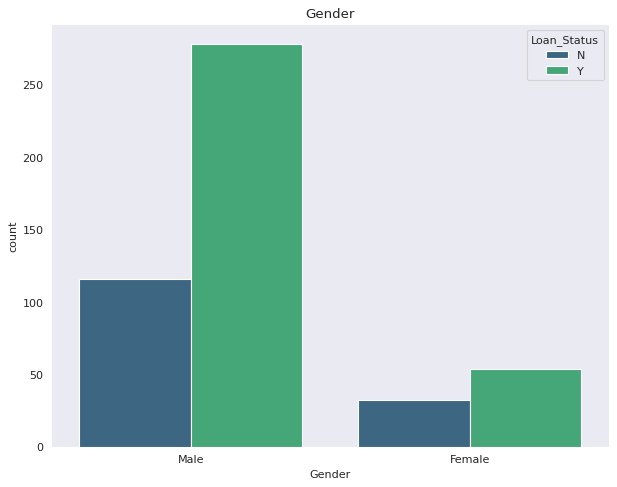

In [7]:
plt.figure(figsize=(9, 7), dpi=80)
plt.title('Gender')
sns.countplot(x='Gender',data=df,hue='Loan_Status' ,palette='viridis')
plt.show()

### Gender Education

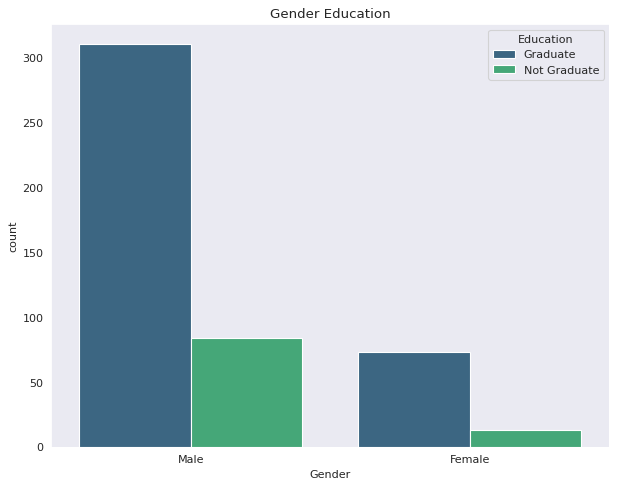

In [8]:
plt.figure(figsize=(9, 7), dpi=80)
plt.title('Gender Education')
sns.countplot(x='Gender', hue='Education', data=df, palette='viridis')
plt.show()

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Gender Married

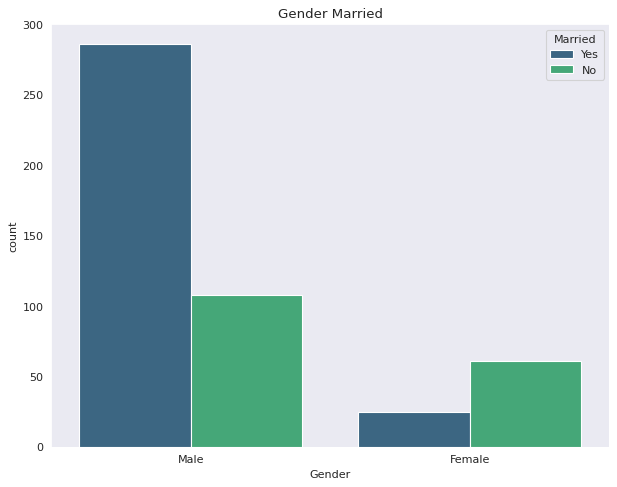

In [10]:
plt.figure(figsize=(9, 7), dpi=80)
plt.title('Gender Married')
sns.countplot(x='Gender', hue='Married', data=df, palette='viridis')
plt.show()

### Gender Self Employed

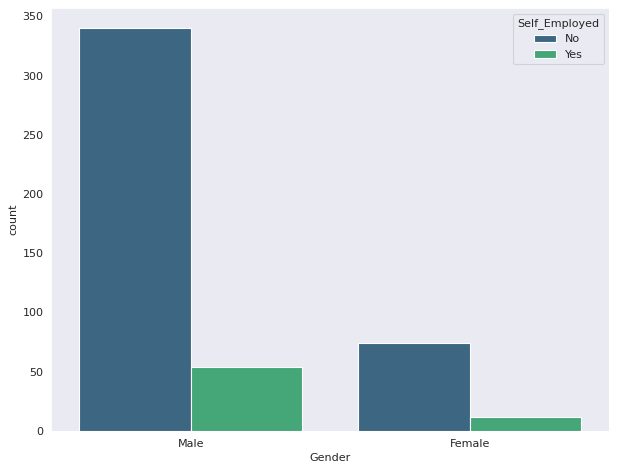

In [11]:
plt.figure(figsize=(9, 7), dpi=80)
sns.countplot(x='Gender', hue='Self_Employed',data=df ,palette='viridis')
plt.show()

### Gender  Property Area

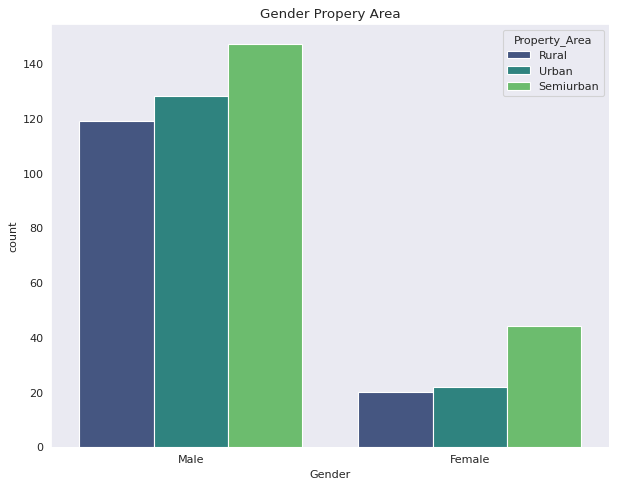

In [12]:
plt.figure(figsize=(9, 7), dpi=80)
plt.title('Gender Propery Area')
sns.countplot(x='Gender', hue='Property_Area', data=df, palette='viridis')
plt.show()

## Preprocessing

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [14]:
df.drop(['Loan_ID'], axis=1, inplace=True)

### Encode Label

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lb = LabelEncoder()

In [17]:
df['Gender'] = lb.fit_transform(df['Gender'])
df['Married'] = lb.fit_transform(df['Married'])
df['Education'] = lb.fit_transform(df['Education'])
df['Self_Employed'] = lb.fit_transform(df['Self_Employed'])
df['Property_Area'] = lb.fit_transform(df['Property_Area'])
df['Dependents'] = lb.fit_transform(df['Dependents'])

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


### Scale Data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
x = df.iloc[:, 0:11]
y = df['Loan_Status']

In [21]:
sc = StandardScaler()

In [22]:
x = sc.fit_transform(x)

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43, test_size=0.32)

## Create Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

In [26]:
models   = []
names    = []
accuracy = []

In [27]:
models.append(('knn', KNeighborsClassifier(n_neighbors=4)))
models.append(('NV', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('EXTRA', ExtraTreesClassifier()))
models.append(('LogisticRegression',LogisticRegression()))


In [28]:

for name, model in models:
    kfold = KFold(10, random_state=10)
    cross_val = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    accuracy.append(cross_val)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cross_val.mean(), cross_val.std())
    print(msg)

/home/amir/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


knn: 0.705682 (0.063931)
NV: 0.766572 (0.067896)


/home/amir/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/amir/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForest: 0.779167 (0.069438)
Tree: 0.665530 (0.059144)


/home/amir/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/amir/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.791477 (0.068042)


/home/amir/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


EXTRA: 0.748295 (0.065769)


/home/amir/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogisticRegression: 0.788352 (0.066176)


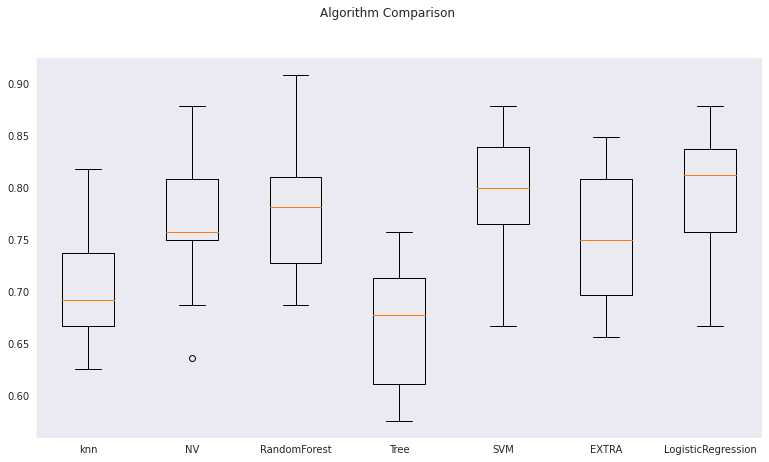

In [29]:
fig = plt.figure(figsize=(13,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(accuracy)
ax.set_xticklabels(names)
plt.show()

## Navie Byes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model = GaussianNB()

In [32]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
model.score(x_test, y_test)

0.8311688311688312

In [34]:
y_pred = model.predict(x_test)

## Metrics

In [35]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print("Classifiction Report :")
print(classification_report(y_test, y_pred))
print()
print("accuracy : {0:.2f}".format(accuracy_score(y_test, y_pred)))

Confusion Matrix : 
[[34 22]
 [ 4 94]]

Classifiction Report :
              precision    recall  f1-score   support

           N       0.89      0.61      0.72        56
           Y       0.81      0.96      0.88        98

    accuracy                           0.83       154
   macro avg       0.85      0.78      0.80       154
weighted avg       0.84      0.83      0.82       154


accuracy : 0.83
